# Tiny example for Holt-Winters model
This exercise contains forecasting example using Holt-Winters Method (Triple Exponential Smoothing). The dataset used in this example is Atmospheric CO₂ levels from air samples collected at Mauna Loa Observatory, Hawaii, USA from March 1958 to August 2022. 
Source: https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline 

In [2]:
df = pd.read_csv('Data/co2_mm_mlo.csv')
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


We need to create out Date Time Index

In [3]:
#Creating the date column
df['date'] = pd.to_datetime(dict(year=df['year'], month=df['month'], day=1))

#Using the date column as index and setting the frequency as months

df.set_index('date', inplace=True)
df.index.freq = 'MS'
df.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
date,,,,,,,,
1958-03-01,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1958-04-01,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05-01,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
1958-06-01,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
1958-07-01,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [4]:
df.tail()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
date,,,,,,,,
2022-04-01,2022,4,2022.2917,420.23,417.54,28,0.85,0.31
2022-05-01,2022,5,2022.3750,420.99,417.60,30,0.76,0.27
2022-06-01,2022,6,2022.4583,420.99,418.62,28,0.30,0.11
2022-07-01,2022,7,2022.5417,418.90,418.56,27,0.57,0.21
2022-08-01,2022,8,2022.6250,417.19,419.15,27,0.34,0.13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 774 entries, 1958-03-01 to 2022-08-01
Freq: MS
Data columns (total 8 columns):
year              774 non-null int64
month             774 non-null int64
decimal date      774 non-null float64
average           774 non-null float64
deseasonalized    774 non-null float64
ndays             774 non-null int64
sdev              774 non-null float64
unc               774 non-null float64
dtypes: float64(5), int64(3)
memory usage: 54.4 KB


In [6]:
#info says non-null for all columns but lets be sure
df.isna().sum()

year              0
month             0
decimal date      0
average           0
deseasonalized    0
ndays             0
sdev              0
unc               0
dtype: int64

## Train Test Split
Doing a train test split roughly 25-75

In [7]:
train_data = df.iloc[:576]
test_data = df.iloc[576:]

Lets visualize data before we create the model

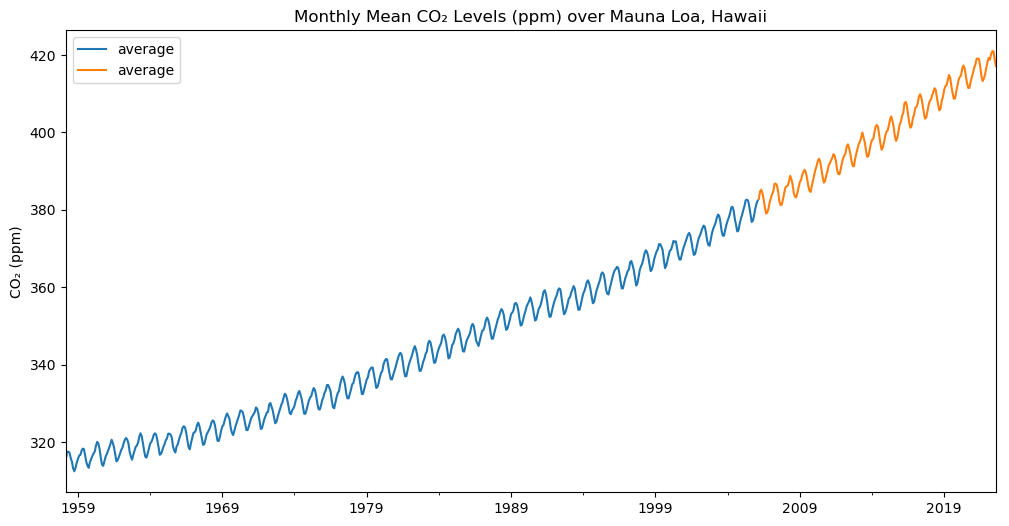

In [8]:
title='Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='CO₂ (ppm)'
xlabel=''

ax = train_data['average'].plot(legend=True,figsize=(12,6),title=title)
test_data['average'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

## Fitting the Model

In [9]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
#Lets create multiple models to pick out the best
fitted_mul_model = ExponentialSmoothing(train_data['average'], trend='add', seasonal='mul', seasonal_periods=12).fit()
fitted_add_model = ExponentialSmoothing(train_data['average'], trend='add', seasonal='add', seasonal_periods=12).fit()

In [10]:
test_pred_mul = fitted_mul_model.forecast(198).rename('HW Mul Forecast')
test_pred_add = fitted_add_model.forecast(198).rename('HW Add Forecast')

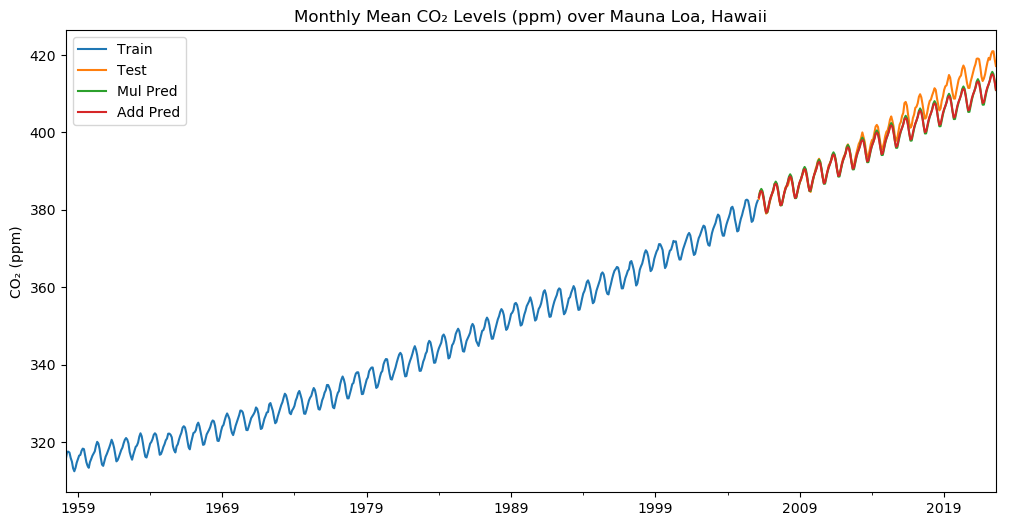

In [11]:
title='Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='CO₂ (ppm)'
xlabel=''

ax = train_data['average'].plot(legend=True,figsize=(12,6),title=title, label = 'Train')
test_data['average'].plot(legend=True, label = 'Test')
test_pred_mul.plot(legend=True, label= 'Mul Pred')
test_pred_add.plot(legend=True, label= 'Add Pred')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel);

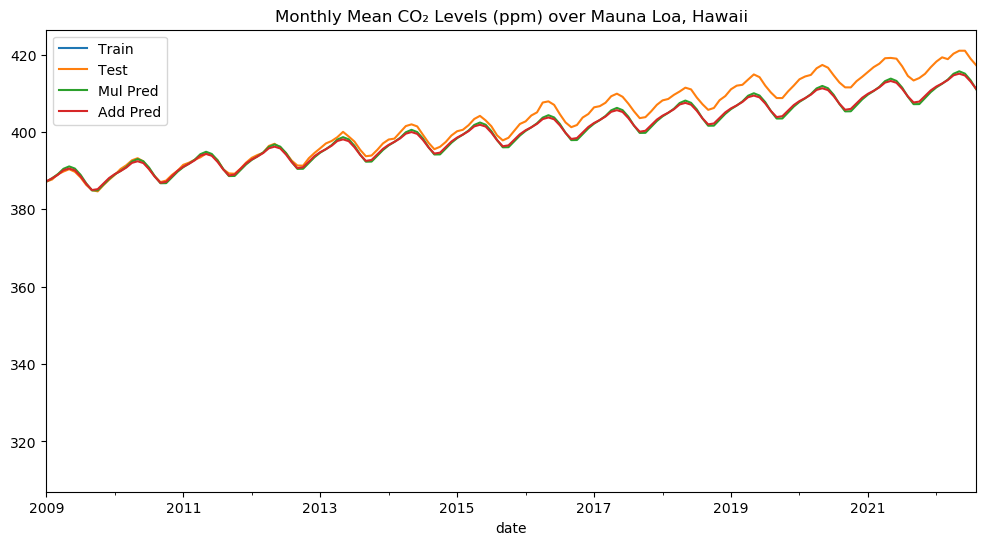

In [12]:
title='Monthly Mean CO₂ Levels (ppm) over Mauna Loa, Hawaii'
ylabel='CO₂ (ppm)'
xlabel=''

ax = train_data['average'].plot(legend=True,figsize=(12,6),title=title,label='Train')
test_data['average'].plot(legend=True, label = 'Test')
test_pred_mul.plot(legend=True, label= 'Mul Pred', xlim=['2009-01-01', '2022-08-01'])
test_pred_add.plot(legend=True, label= 'Add Pred', xlim=['2009-01-01', '2022-08-01']);

We can tell that both perform roughly the same lets evaluate them

## Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [14]:
test_avg = test_data['average']
mae_add = mean_absolute_error(test_avg, test_pred_add)
mae_mul = mean_absolute_error(test_avg, test_pred_mul)

mse_add = mean_squared_error(test_avg, test_pred_add)
mse_mul = mean_squared_error(test_avg, test_pred_mul)

rmse_add = np.sqrt(mean_squared_error(test_avg, test_pred_add))
rmse_mul = np.sqrt(mean_squared_error(test_avg, test_pred_mul))

print(f'Evaluation metrics for additive trend, additive seasonality \nMAE: {mae_add}, MSE: {mse_add}, RMSE: {rmse_add}')
print('-'*70)
print(f'Evaluation metrics for additive trend, multiplicative seasonality \nMAE: {mae_mul}, MSE: {mse_mul}, RMSE: {rmse_mul}')



Evaluation metrics for additive trend, additive seasonality 
MAE: 2.3083722511789073, MSE: 9.931714868149106, RMSE: 3.1514623380502433
----------------------------------------------------------------------
Evaluation metrics for additive trend, multiplicative seasonality 
MAE: 2.326574990027046, MSE: 9.96853129073361, RMSE: 3.1572980997577043


In [15]:
test_avg.describe()

count    198.000000
mean     399.410455
std       11.412728
min      379.040000
25%      389.385000
50%      398.565000
75%      409.035000
max      420.990000
Name: average, dtype: float64

## Forecasting into Future

In [16]:
#additive seasonality model worked a little bit better than multiplicative so lets use additive
final_model = ExponentialSmoothing(df['average'], trend='add', seasonal='add', seasonal_periods=12).fit()

In [17]:
forecast_predictions = final_model.forecast(36)

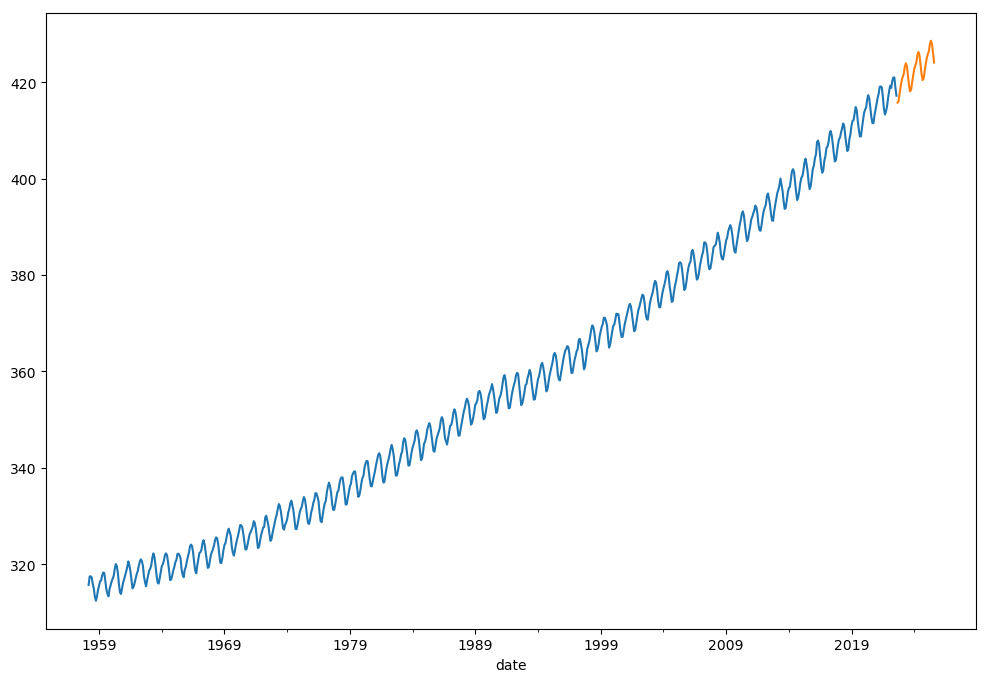

In [18]:
df['average'].plot(figsize=(12,8))
forecast_predictions.plot();